# Markov model generalized to 2 parenting relationship (also ngram model, n=3)

In [2]:
import nltk
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import json
import os
from pathlib import Path
from IPython.display import Image, Audio
from music21 import note , chord , stream , instrument , converter   
import mido

In [3]:
# create a dict with the ngram model, it receives a list with the samples as string
ngram_dict = {}

def create_trigram_dict(corpus):
    n = 3
    ngrams = nltk.ngrams(corpus, n)
    
    for grams in ngrams:
        dict_key = grams[:-1][0] + " " + grams[:-1][1]
        if dict_key in ngram_dict:
            ngram_dict[dict_key].append(grams[-1])
        else:
            ngram_dict[dict_key] = []
            ngram_dict[dict_key].append(grams[-1])

In [4]:
def generate_trigram(seed, samples, ngram_dict):
    output = seed  
    for i in range(samples):
        # When it reaches the last prefix, there is no suffix, so end
        try:
            new_sample = random.choice(ngram_dict[seed])
        except:
            return output
        output += " " + new_sample
        seed = seed.split(" ")[1] + " " + new_sample

    return output

In [5]:
songs = []
for filename in os.listdir("dataset/midi_songs"):
    if filename.endswith(".mid"): 
        #print(filename)
        s = 'dataset/midi_songs/'+filename
        #song = mido.MidiFile(s)
        conv = converter.parse(s)
        songs.append(conv)
        continue
    else:
        continue


/Users/dylan/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Martin Rosok Copyright \xa9 1998'>; getting generic Instrument
  warnings.warn(
/Users/dylan/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=6, channel=None, data=b'Pok\xe9mon: Elite Four (Piano)'>; getting generic Instrument
  warnings.warn(


In [6]:
notes = []
for s in songs:
    notes_to_parse = s.flat.notes
    notes.append(notes_to_parse)
    

In [7]:
notes[:5]

[<music21.stream.iterator.StreamIterator for Score:0x1065939d0 @:0>,
 <music21.stream.iterator.StreamIterator for Score:0x297633040 @:0>,
 <music21.stream.iterator.StreamIterator for Score:0x297718b20 @:0>,
 <music21.stream.iterator.StreamIterator for Score:0x2977183d0 @:0>,
 <music21.stream.iterator.StreamIterator for Score:0x297718a90 @:0>]

In [8]:
#                                      song1  song2
#generate list of list of notes --> [[A,F,C],[D,G,B]]
listoflists = []
for n in notes:
    notes_demo = []
    for element in n:
        # if the element is a Note , then store it's Pitch
        if isinstance(element , note.Note):
            notes_demo.append(str(element.pitch))
        
        elif isinstance(element , chord.Chord):
            notes_demo.append('+'.join(str(n) for n in element.normalOrder))
            
    listoflists.append(notes_demo)
        

In [9]:
# converting into a single string each song in listoflists
final = []
for song in listoflists:
    l = song
    melody = ''
    for i in l:
        melody = melody + ' ' + i
    final.append(melody)
    melody = ''

# Dictionaries has an ngram_dict in each position (for each song)

In [10]:
dictionaries = []
for progression in final:
    ngram_dict = {}
    create_trigram_dict(progression.split(" "))
    dictionaries.append(ngram_dict)
    

In [11]:
dictionaries[0]

{' F3': ['F3'],
 'F3 F3': ['B-4', 'B-4'],
 'F3 B-4': ['F3', 'F3'],
 'B-4 F3': ['G4', 'G4'],
 'F3 G4': ['G#4', 'G3', 'G#4', 'G3'],
 'G4 G#4': ['F4', 'F4', 'B-2', 'B-2', 'C#2'],
 'G#4 F4': ['F3', 'F3', 'G4'],
 'F4 F3': ['G4', 'G4'],
 'G4 G3': ['E-4', 'E-4'],
 'G3 E-4': ['G#3', 'G#3'],
 'E-4 G#3': ['F3', 'F3'],
 'G#3 F3': ['F5', 'F5'],
 'F3 F5': ['G5', 'G5'],
 'F5 G5': ['G#5', 'G#5', 'G#5', 'G#5', 'B-2'],
 'G5 G#5': ['F3', 'F3', 'F3', 'F3', 'F2', 'F2', 'F2', 'F2', 'B-5', 'B-5'],
 'G#5 F3': ['B-5', 'B-5', 'B-5', 'B-5'],
 'F3 B-5': ['G5', 'C6', 'G5', 'C6'],
 'B-5 G5': ['G#5', 'G#5', 'G#5', 'G#5', 'B-2'],
 'B-5 C6': ['B-5', 'B-5', 'B-5', 'B-5', 'B-2'],
 'C6 B-5': ['F3', 'F3', 'F2', 'F2', 'B-2'],
 'B-5 F3': ['E-6', 'E-6'],
 'F3 E-6': ['C#4', 'E-3'],
 'E-6 C#4': ['F6'],
 'C#4 F6': ['C4'],
 'F6 C4': ['F3'],
 'C4 F3': ['F3'],
 'E-6 E-3': ['F6'],
 'E-3 F6': ['E3'],
 'F6 E3': ['F2'],
 'E3 F2': ['F2'],
 'F2 F2': ['B-4',
  'B-4',
  'F2',
  'B-2',
  '7+10',
  'C#3',
  'F2',
  'B-2',
  'F2',
  'F2',
 

In [29]:
st = ''
l = dictionaries[7]
sample = 50
keys = list(l.keys()) # gets the key for producing a trigram
generated_melody = generate_trigram(keys[0], sample, l)
print(generated_melody)
st = "tinyNotation: 3/4 " + generated_melody

 F2 7+8+0 C2 G#2 7+8+0 F2 E4 8+10 E4 B-4 C5 B-4 C#5 B-4 C5 C5 5+8+0 B4 5+8+0 B-4 G#4 E-4 C#2 E4 B4 F2 7+8+0 C2 5+7+10 G#2 F2 C2 C#2 G#2 F2 G#4 B4 B4 E4 C3 7+8+0 7+8+0 8+10 E4 8+10 E4 8+10 G2 G#2 G2 F2


In [30]:
littleMelody = converter.parse(st)
littleMelody.show('midi')

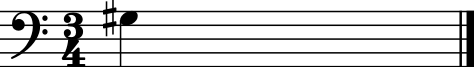

In [14]:
littleMelody.show()